<a href="https://colab.research.google.com/github/santiagoahl/breast-cancer-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer diagnosis prediction

>[Breast Cancer diagnosis prediction](#scrollTo=u2QwcNCnwcd-)

>[Libraries](#scrollTo=Bd6fH_rGwgs4)

>[Data import](#scrollTo=k7-uwN5SwiW4)

>[Data-viz](#scrollTo=xzFowXlJwllq)

>[Data preprocessing](#scrollTo=be7p1uhAwnY-)

>>[Data cleaning](#scrollTo=eASnNPTiw-Pl)

>>>[Null data](#scrollTo=HS62uFUAOJH7)

>>[Data balancing: Random Undersampler](#scrollTo=itMAh5VwNY5_)

>>[Correlation analysis](#scrollTo=zNyWW2ZgVwE3)

>>[Train-Test Split](#scrollTo=n_bUDTTXw6-P)

>>[One-hot-Encoding](#scrollTo=RC357Wk3OamS)

>[Data Normalization](#scrollTo=pVqhde00R0xS)

>>[PCA](#scrollTo=XJoQwnQLw8CH)

>[Training](#scrollTo=7dze0c_wwo9h)

>[Testing](#scrollTo=qs1GYHz2xFJv)

>[Model export](#scrollTo=1wESuRqyxGR4)

>[Model import](#scrollTo=kzw1Ll5ixcCA)



# Libraries

In [119]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer


from imblearn.under_sampling import RandomUnderSampler

import warnings
import joblib

In [88]:
warnings.filterwarnings('ignore')

# Data import

## From local machine

In [7]:
import zipfile as zf

files = zf.ZipFile("/home/santi/courses/breast-cancer-prediction/data/data.zip",'r')
files.extractall()
files.close()

In [10]:
df = pd.read_csv('/home/santi/courses/breast-cancer-prediction/data.csv')

## From colab

In [4]:
df = pd.read_csv('/content/drive/MyDrive/personal-projects/breast-cancer/data/data.csv')

In [12]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [13]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

# Data-viz

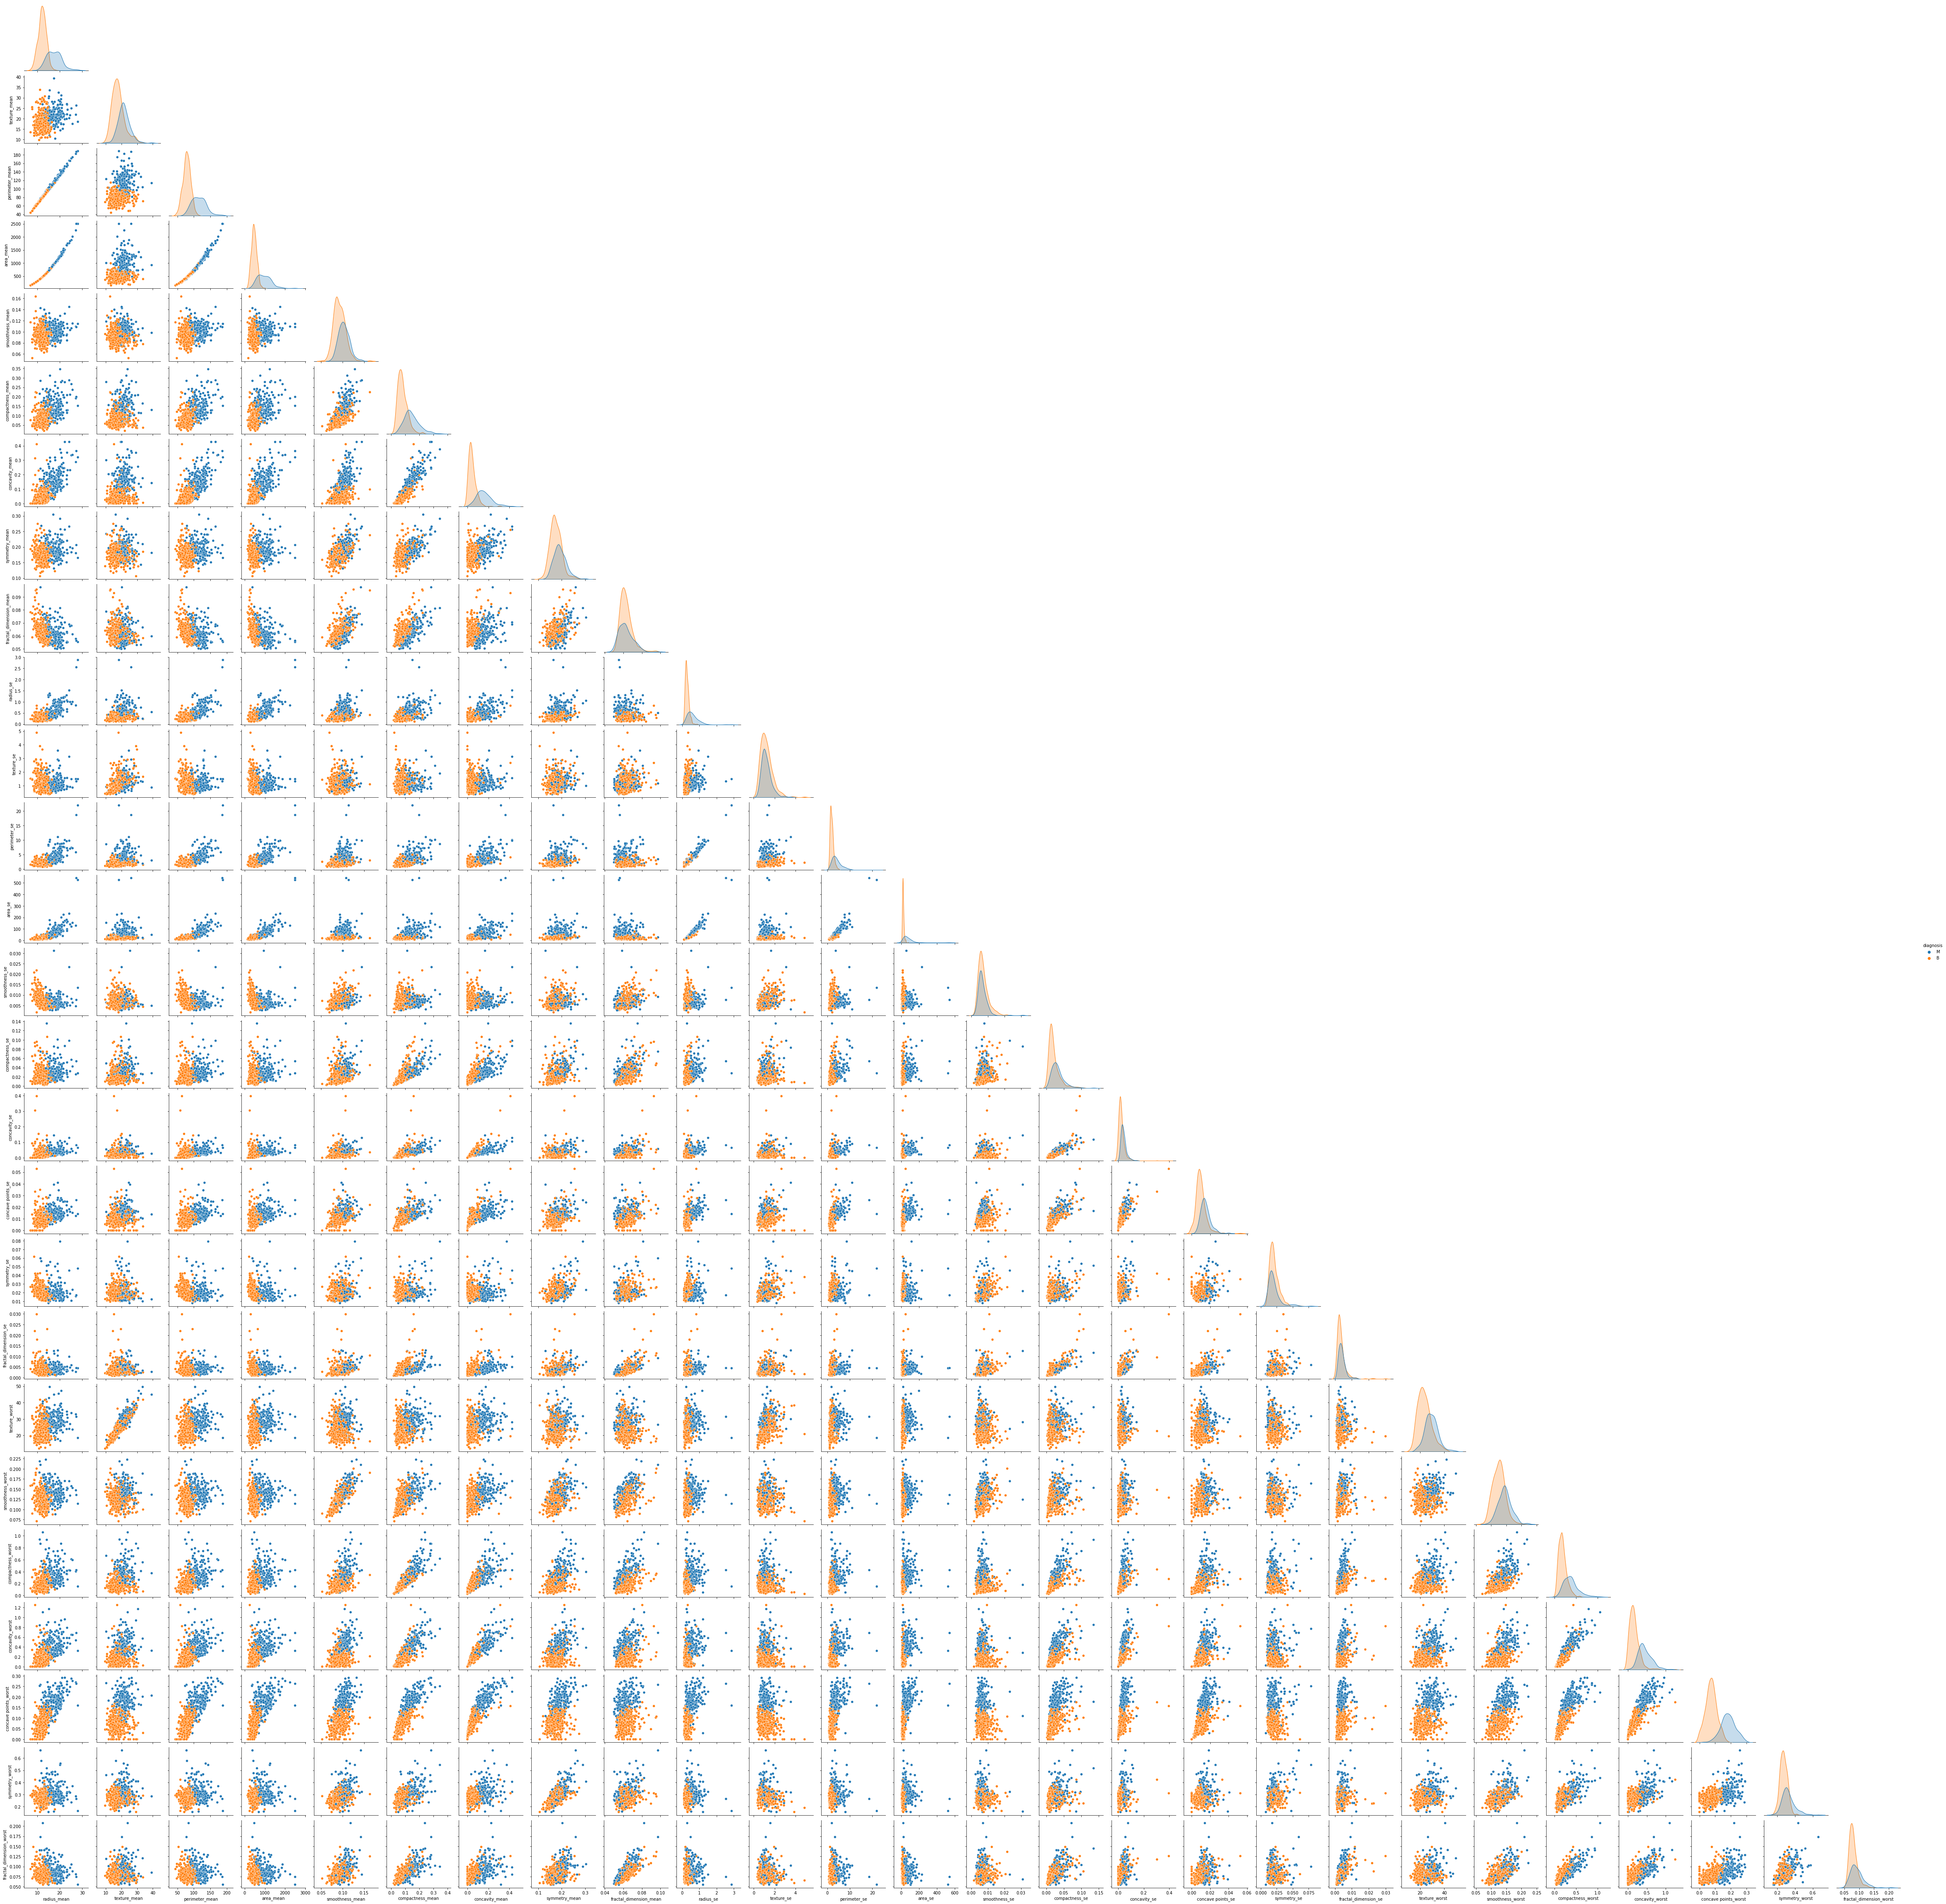

<Figure size 432x288 with 0 Axes>

In [136]:
sns.pairplot(data=df, hue='diagnosis', corner=True)
plt.show()
plt.savefig('/content/drive/MyDrive/personal-projects/breast-cancer/images/scatter.png')

# Data preprocessing

## Data cleaning

### Null data

In [13]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Correlation analysis

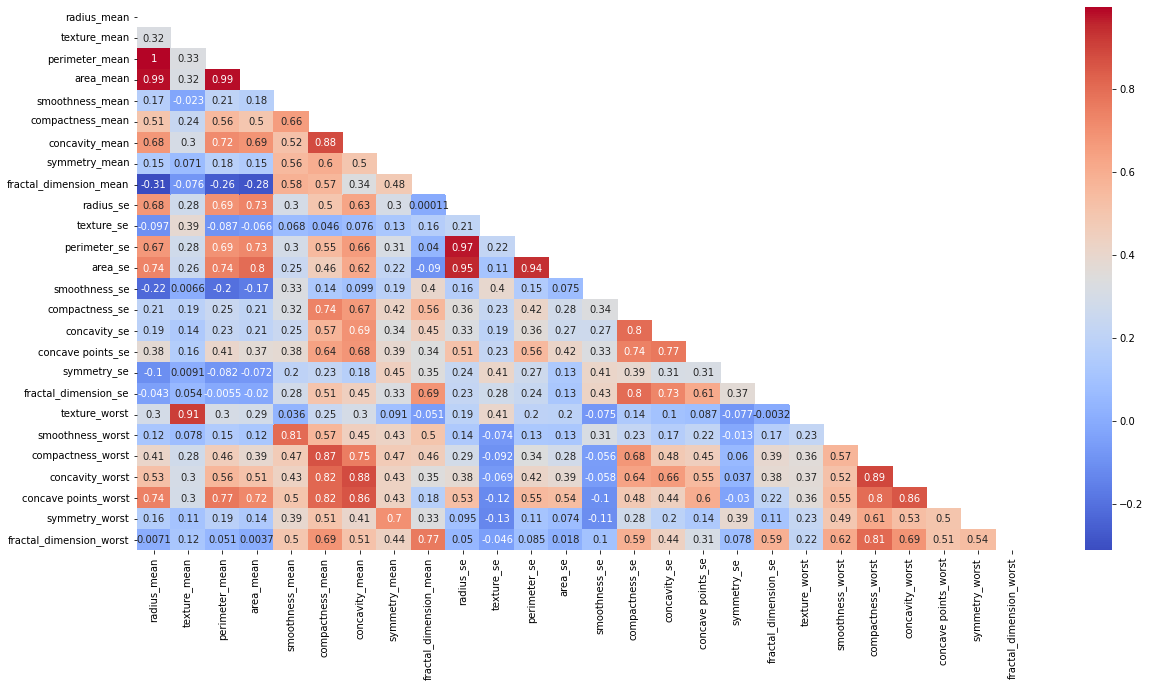

<Figure size 432x288 with 0 Axes>

In [135]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()), cmap='coolwarm')
plt.show()
plt.savefig('/content/drive/MyDrive/personal-projects/breast-cancer/images/correlations.png')

We could observe that `concave points_mean`, `radius_worst`, `perimeter_worst` and `area_worst` have a lot of over-correlated features, so we will drop them.

In [68]:
df.drop(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst'], axis=1, inplace=True)

In [69]:
df.head(4)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
0          0.11840           0.27760          0.3001         0.2419   
1          0.08474           0.07864          0.0869         0.1812   
2          0.10960           0.15990          0.1974         0.2069   
3          0.14250           0.28390          0.2414         0.2597   

   fractal_dimension_mean  ...  concave points_se  symmetry_se  \
0                 0.07871  ...            0.01587      0.03003   
1                 0.05667  ...            0.01340      0.01389   
2                 0.05999  ...            0.02058      0.02250   
3                 0.09744  ...            0.01867      0.05963   

   fractal_dimension_se  texture_worst  smoothness_worst  compactness_worst  \
0              0.006193          17.33            0.1622             0.6656   
1              0.003532          23.41            0.1238             0.1866   
2              0.004571          25.53            0.1444             0.4245   
3              0.009208          26.50            0.2098             0.8663   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  

[4 rows x 27 columns]

## Data balancing: Random Undersampler

In [15]:
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

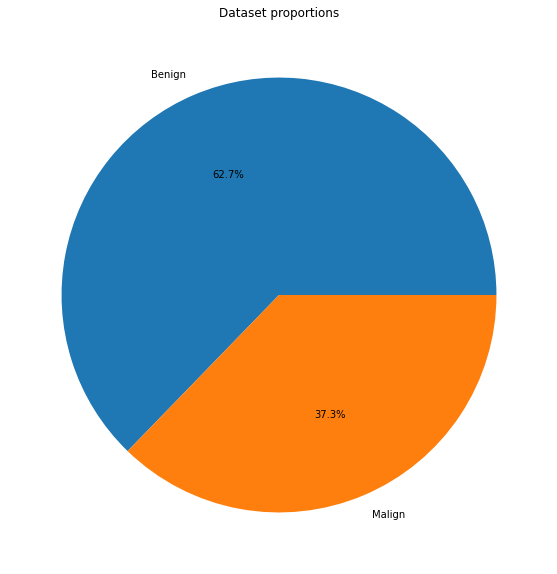

<Figure size 432x288 with 0 Axes>

In [133]:
labels, counts = np.unique(df.diagnosis, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=['Benign', 'Malign'])
plt.title('Dataset proportions')
plt.show()
plt.savefig('/content/drive/MyDrive/personal-projects/breast-cancer/images/unbalanced_data.png')

We consider that the better way to balance the dataset is appying under sample. We could do SMOTE instead but diagnosting cancer is not just a play ground. So create new data could probably be dangerous. 

In [16]:
under_sampler = RandomUnderSampler(random_state=42)
X, y = under_sampler.fit_resample(X, y)

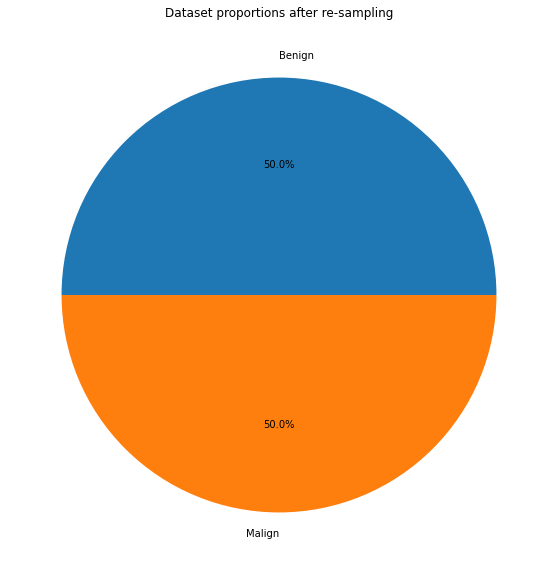

<Figure size 432x288 with 0 Axes>

In [134]:
labels, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=['Benign', 'Malign'])
plt.title('Dataset proportions after re-sampling')
plt.show()
plt.savefig('/content/drive/MyDrive/personal-projects/breast-cancer/images/balanced_data.png')

There are no Null data

## Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## One-hot-Encoding

In [112]:
y_train.replace(list(np.unique(y_train)), [0, 1], inplace=True)
y_test.replace(list(np.unique(y_test)), [0, 1], inplace=True)

## Data Normalization

In [18]:
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test))

In [19]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.124184      0.232330        0.127171   0.061149         0.260283   
1       0.206614      0.288468        0.197338   0.111446         0.199227   
2       0.252735      0.287792        0.259536   0.135346         0.587670   
3       0.526029      0.412580        0.513948   0.385927         0.315096   
4       0.685982      0.254988        0.661258   0.588752         0.310536   
..           ...           ...             ...        ...              ...   
334     0.261076      0.300304        0.264091   0.143485         0.452869   
335     0.336637      0.438620        0.344506   0.205968         0.220240   
336     0.526520      0.297937        0.520353   0.385927         0.359104   
337     0.386684      0.327021        0.370196   0.249677         0.157498   
338     0.420539      0.202570        0.403644   0.276031         0.314798   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.187964        0.102109             0.121173       0.307576   
1            0.086283        0.046204             0.067048       0.408081   
2            0.450034        0.113051             0.263569       0.327778   
3            0.238360        0.270150             0.340308       0.319192   
4            0.203178        0.273664             0.420726       0.331818   
..                ...             ...                  ...            ...   
334          0.340531        0.225000             0.278479       0.492424   
335          0.348506        0.241097             0.185686       0.198990   
336          0.263542        0.312793             0.437127       0.541414   
337          0.112815        0.098618             0.141501       0.245960   
338          0.146433        0.129475             0.226789       0.328788   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.361837  ...      0.065015       0.267058   
1                  0.234625  ...      0.149204       0.248134   
2                  0.475358  ...      0.221526       0.329158   
3                  0.153960  ...      0.498572       0.516258   
4                  0.012216  ...      0.803805       0.384328   
..                      ...  ...           ...            ...   
334                0.316976  ...      0.189630       0.341951   
335                0.242418  ...      0.237474       0.406450   
336                0.216091  ...      0.513778       0.417377   
337                0.094145  ...      0.327597       0.523721   
338                0.139217  ...      0.305715       0.152985   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.071690    0.027309          0.494816           0.191431   
1           0.136577    0.069695          0.285478           0.059930   
2           0.217183    0.106515          0.491514           0.260801   
3           0.455754    0.334998          0.497458           0.194245   
4           0.733546    0.722666          0.430100           0.131472   
..               ...         ...               ...                ...   
334         0.190950    0.085671          0.416892           0.231404   
335         0.251147    0.121193          0.207555           0.281175   
336         0.489770    0.338243          0.453213           0.176199   
337         0.302685    0.184873          0.245856           0.148839   
338         0.271247    0.169795          0.424156           0.105568   

     concavity_worst  concave points_worst  symmetry_worst  \
0           0.152393              0.286357        0.221959   
1           0.078658              0.216357        0.240489   
2           0.106496              0.376632        0.200473   
3           0.338889              0.473883        0.304356   
4           0.244530              0.625430        0.186280   
..               ...                   ...             ...   
334         0.219915              0.432302        0

# Training

In [114]:
column_transformer = ColumnTransformer([
    ("scaler", sc, X.columns.tolist()) # adjusts data to the same scale
], remainder="passthrough")

logistic_pipeline = Pipeline([
    ('datafeed', column_transformer),              # grabs finalized datasets
    ('selector', SelectKBest(f_classif, k='all')), # variable selection procedure
    ('classifier', LogisticRegression(penalty='l2', C=0.5, verbose=1, n_jobs=-1))           # Logistic modeling
])

In [115]:
logistic_pipeline.fit(X_train, y_train)
y_test_pred = logistic_pipeline.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34977D+02    |proj g|=  3.24731D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   31     20     22      1     0     0   8.577D-05   9.149D+01
  F =   91.487549818270750     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished


KeyError: "None of [Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',\n       'smoothness_mean', 'compactness_mean', 'concavity_mean',\n       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',\n       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',\n       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',\n       'fractal_dimension_se', 'radius_worst', 'texture_worst',\n       'perimeter_worst', 'area_worst', 'smoothness_worst',\n       'compactness_worst', 'concavity_worst', 'concave points_worst',\n       'symmetry_worst', 'fractal_dimension_worst'],\n      dtype='object')] are in the [columns]"

## Hyperparameter optimization: Grid Search CV

In [148]:
# Defining parameter range 
param_grid = {'classifier__multi_class':['ovr', 'multinomial'], 
              'classifier__solver': ['liblinear', 'lbfgs']
             }  
  
grid = GridSearchCV(logistic_pipeline, param_grid, verbose = 3, cv=10, scoring=f1_score)

In [149]:
# Fitting the model

grid.fit(X_train, y_train)

Fitting 10 folds for each of 212 candidates, totalling 2120 fits
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=922;, scor

[CV 9/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=928;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=928;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=o

[CV 9/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=935;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=935;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=936;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=o

[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=943;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ov

[CV 7/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=951;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=951;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=951;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=951;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=952;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=952;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=952;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=952;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=o

[CV 8/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=959;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=959;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=959;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=960;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=960;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=960;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=960;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=960;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=o

[CV 10/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=966;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=liblinear, selector__k=967;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=o

[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=922;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=922;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=922;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=922;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=923;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=923;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=923;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=923;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=933;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=933;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=942;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=942;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=948;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=948;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=949;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=958;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=959;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=959;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 5/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=966;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=967;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=967;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, se

[CV 10/10] END classifier__multi_class=ovr, classifier__solver=lbfgs, selector__k=974;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=922;, score=nan total 

[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=929;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=930;, scor

[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=938;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=939;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=939;, scor

[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=946;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=946;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=946;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=946;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=947;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=947;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=947;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=947;, scor

[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=954;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=954;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=954;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=954;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=954;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=955;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=955;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=955;, scor

[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=963;, score

[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=970;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=970;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=970;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=970;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=971;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=971;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=971;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=liblinear, selector__k=971;, scor

[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=925;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=926;, score=nan total time=   0.0s
[CV 8/1

[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=933;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=934;, score=nan total time=   0.0s
[CV 8/1

[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=941;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=942;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=942;, score=nan total time=   0.0s
[CV 3/1

[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=950;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=950;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=950;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=950;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=951;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=951;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=951;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=951;, score=nan total time=   0.0s
[CV 5/1

[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=959;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=959;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 3/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 4/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=960;, score=nan total time=   0.0s
[CV 7/1

[CV 5/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 6/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 7/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 8/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 9/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 10/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=969;, score=nan total time=   0.0s
[CV 1/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=970;, score=nan total time=   0.0s
[CV 2/10] END classifier__multi_class=multinomial, classifier__solver=lbfgs, selector__k=970;, score=nan total time=   0.0s
[CV 3/1

ValueError: 
All the 2120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 922. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 923. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 924. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 925. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 926. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 927. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 928. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 929. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 930. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 931. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 932. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 933. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 934. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 935. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 936. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 937. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 938. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 939. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 940. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 941. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 942. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 943. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 944. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 945. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 946. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 947. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 948. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 949. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 950. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 951. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 952. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 953. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 954. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 955. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 956. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 957. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 958. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 959. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 960. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 961. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 962. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 963. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 964. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 965. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 966. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 967. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 968. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 969. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 970. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 971. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 972. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 973. Use k='all' to return all features.

--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 402, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 360, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/pipeline.py", line 894, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  [Previous line repeated 1 more time]
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py", line 851, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 471, in fit
    self._check_params(X, y)
  File "/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py", line 672, in _check_params
    raise ValueError(
ValueError: k should be <= n_features = 30; got 974. Use k='all' to return all features.


In [ ]:
model = grid.best_estimator_

In [150]:
y_pred = model.predict(X_test)

/home/santi/courses/breast-cancer-prediction/venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Notice that we chose the `LogisticRegression` hyper parameters with grid search CV, but we will deal only with the model trained with these best hyperparams instead of calling the grid search's best estimator.

# Testing

In [159]:
# Cross validation testion

results = cross_validate(model, X, y, return_train_score=True, cv=10);
train_score = np.round(np.mean(results['train_score']), decimals=2);
test_score = np.round(np.mean(results['test_score']), decimals=2);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

In [160]:
print(f'With cross validation, The train score is {train_score} while the test score is {test_score}')

With cross validation, The train score is 0.95 while the test score is 0.94


In [161]:
# F1 & Accuracy scores
model_f1_score = f1_score(y_pred, y_test, pos_label='M')
model_accuracy = accuracy_score(y_pred, y_test)
print(f'The model archieved a {np.round(model_f1_score, decimals=3)*100}% of f1 score and a {np.round(model_accuracy, decimals=3)*100}% of accuracy')

The model archieved a 100.0% of f1 score and a 100.0% of accuracy


<Figure size 640x480 with 0 Axes>

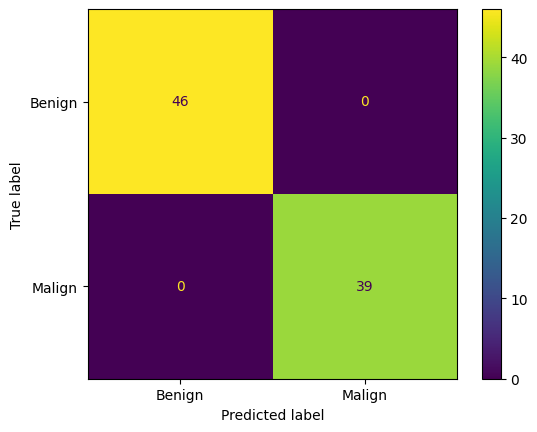

In [162]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malign'])
plt.suptitle('Confusion Matrix')
disp.plot()
plt.show()
#plt.savefig('/content/drive/MyDrive/personal-projects/breast-cancer/images/confusion_matrix.png')

Notice that our model is very sensible: **There are no false negatives** which is a great result.

# Model export

In [163]:
joblib.dump(estimator, '/home/santi/courses/breast-cancer-prediction/models/model.pkl')

['/home/santi/courses/breast-cancer-prediction/models/model.pkl']

# Model import

In [129]:
model = joblib.estimator('/home/santi/courses/breast-cancer-prediction/models/model.pkl')

---
*Let’s change the world, Together!*


<img align=centerright src="https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F202df933-5432-47f6-aba6-a9a054cece4b%2Fpages-PhotoRoom.png?table=block&id=0b1ffffe-7be4-41f2-86dd-26cad410a64b&spaceId=12eea25e-0790-4a8f-aa1c-b60f93c02da2&width=250&userId=4be5c684-7292-494e-bbb2-2554f1af3879&cache=v2"  width="70" height="70">

<img align=centerright src="https://cdn-icons-png.flaticon.com/512/25/25231.png"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/61/61109.png?w=360"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/39/39552.png"  width="70" height="70">
<img align=centerright src="https://cdn.freebiesupply.com/images/large/2x/instagram-icon-white-on-black.png"  width="100" height="70">

[Personal Blog](https://santiagoal.super.site/)      [GitHub](https://github.com/santiagoahl)    [LinkedIn](https://www.linkedin.com/in/santiago-ahumada-lozano/)   [Twitter](https://twitter.com/sahumadaloz)  [Instagram](https://www.instagram.com/santiago_al10/)
